In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
import warnings
import matplotlib.pyplot as plt
import random
import copy
from sklearn.decomposition import PCA
from PIL import Image
import joblib

In [8]:
image_size = 60
input_image = 'datasets/anime_faces/'

n = 0
for image in os.listdir(input_image):
    n += 1

train_images = np.zeros((n, image_size, image_size, 3))

for i, image in enumerate(os.listdir(path)):
    img = Image.open(input_image + image)
    img = img.resize((image_size, image_size))
    train_images[i] = np.array(img)
    train_images[i] = train_images[i] / 255.0


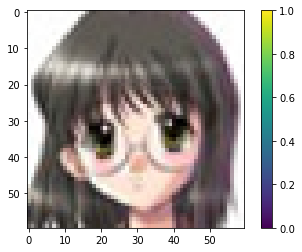

63565


In [9]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.show()
print(n)



In [10]:
latent_dim = 15

rf = RandomForestRegressor(n_estimators=150, max_depth=7, random_state=0, max_samples=0.5, n_jobs=-1)
scaler = MinMaxScaler()
pca = PCA(n_components=latent_dim)

y = train_images.reshape(-1, image_size * image_size * 3).copy()
principle_components = pca.fit_transform(y)
X = scaler.fit_transform(principle_components)


print(X.shape, y.shape)

print('fitting')

rf.fit(X, y)

(63565, 15) (63565, 10800)
fitting


In [ ]:
m = 100
threshold = 80
std_dev = 0.5


input = np.array([[random.uniform(0, 1) for j in range(latent_dim)] for i in range(m)])

y_pred = rf.predict(input)
y_pred = y_pred.reshape(m, image_size, image_size, 3)

fig, axs = plt.subplots(m//10, 10, figsize=(15, 15))
axs = axs.flatten()
# Plot data on the subplots
for i in range(m):
    axs[i].imshow(y_pred[i])
    axs[i].axis('off')  # Turn off axis labels and ticks
